  Survey has been conducted in the technical workplace to measure the attitude towards mental illness and examine the frequency of health disorders ocuuring in work place.

try and take the label "treatment" to see which are the predictors features that take employees to seek a mental health treatment.

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

In [0]:
if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly pdpbox

     |████████████████████████████████| 92kB 5.6MB/s 
     |████████████████████████████████| 133kB 14.5MB/s 
     |████████████████████████████████| 7.1MB 44.1MB/s 
     |████████████████████████████████| 57.7MB 93kB/s 
     |████████████████████████████████| 614kB 39.7MB/s 
     |████████████████████████████████| 225kB 39.6MB/s 
     |████████████████████████████████| 768kB 38.9MB/s 
     |████████████████████████████████| 51kB 20.9MB/s 
     |████████████████████████████████| 194kB 42.4MB/s 
     |████████████████████████████████| 51kB 19.9MB/s 
     |████████████████████████████████| 737kB 38.2MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145035 sha256=5495e38ab867234ccad54572593ad0656d61506f7312fc2eb000daf044b622ac
  Stored in directory: /root/.cache/pip/wheels/ce/c7/f1/dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=c66a00524e62ba7364

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import category_encoders as ce
import category_encoders as ce
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
from matplotlib.pyplot import pie, axis, show
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
import plotly.graph_objs as go 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Imputer
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from mlxtend.classifier import StackingClassifier

In [0]:
data = pd.read_csv ('survey (1).csv')
data.head().T

,0,1,2,3,4
Timestamp,2014-08-27 11:29:31,2014-08-27 11:29:37,2014-08-27 11:29:44,2014-08-27 11:29:46,2014-08-27 11:30:22
Age,37,44,32,31,31
Gender,Female,M,Male,Male,Male
Country,United States,United States,Canada,United Kingdom,United States
state,IL,IN,NaN,NaN,TX
self_employed,NaN,NaN,NaN,NaN,NaN
family_history,No,No,No,Yes,No
treatment,Yes,No,No,Yes,No
work_interfere,Often,Rarely,Rarely,Often,Never
no_employees,6-25,More than 1000,6-25,26-100,100-500


In [0]:
#row count
print(data.shape)

(1259, 27)


In [0]:
#distribution 
print(data.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [0]:
#data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [0]:
#check for missing data
data.isnull().sum().max()
data.head(5).T

,0,1,2,3,4
Timestamp,2014-08-27 11:29:31,2014-08-27 11:29:37,2014-08-27 11:29:44,2014-08-27 11:29:46,2014-08-27 11:30:22
Age,37,44,32,31,31
Gender,Female,M,Male,Male,Male
Country,United States,United States,Canada,United Kingdom,United States
state,IL,IN,NaN,NaN,TX
self_employed,NaN,NaN,NaN,NaN,NaN
family_history,No,No,No,Yes,No
treatment,Yes,No,No,Yes,No
work_interfere,Often,Rarely,Rarely,Often,Never
no_employees,6-25,More than 1000,6-25,26-100,100-500


count    1259.000000
mean       32.076251
std         7.265063
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64
median:  31.0


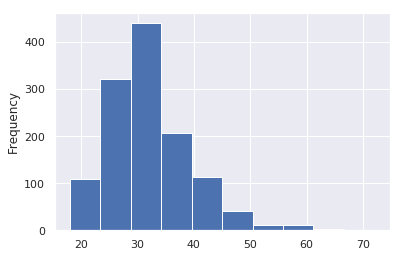

In [0]:
# Replace noise with the mean age
data.Age[data.Age < 15] = 32
data.Age[data.Age > 100] = 32

#statistical summary, median age and histogram
print(data.Age.describe())
print('median: ', np.median(data.Age))

sns.set(style="darkgrid")
data.Age.plot(kind='hist')
plt.show()

interpret: Most people in this survey are in their early 30's and late 20's.



In [0]:
data.work_interfere.fillna(value='No Issue',inplace=True)
data.work_interfere.value_counts()

Sometimes    465
No Issue     264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

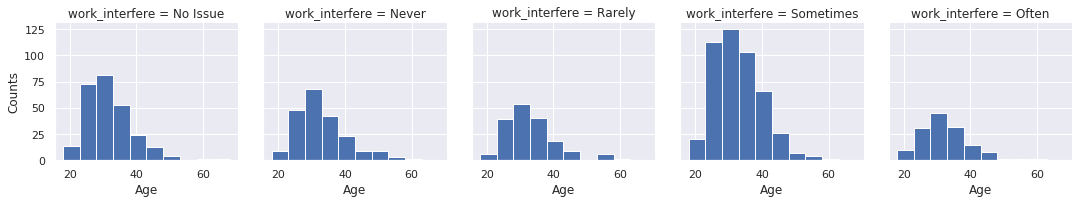

In [0]:
sns.set(style="darkgrid")

g = sns.FacetGrid(col='work_interfere', sharey=True,
                col_order=['No Issue','Never','Rarely','Sometimes','Often'],
                data=data,despine=True)

g = g.map(plt.hist, 'Age', bins=np.arange(18,72,5))

g = g.set_ylabels('Counts')

plt.show()

interpret: The majority of respondents with mental health issues said that it interfered 'sometimes' with their work. However, there are almost no differences in the age distributions between different 'work_interfere' categories. They all show signs of central tendency at around 32 years of age.

In [0]:
data.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Cis Male                                            2
Female (trans)                                      2
Man                                                 2
Female                                              2
ostensibly male, unsure what that really means      1
woman                                               1
All                                                 1
cis male                    

interpret: There are many variations of 'male' and 'female', plus a few gender-non-conforming respondents. Unfortunately because of their scarcity it makes more sense to re-code everything to the binary confines.

In [0]:
# If it contains an 'f' or a 'w', then turn into 'F'
data.Gender[data.Gender.apply(lambda x: 'f' in str.lower(x))] = 'F'
data.Gender[data.Gender.apply(lambda x: 'w' in str.lower(x))] = 'F'

# Else, turn into 'M'
data.Gender[data.Gender != 'F'] = 'M'

In [0]:
data.Gender.value_counts()

M    1006
F     253
Name: Gender, dtype: int64

interpret: There are more men than women in this survey. But maybe that's a reflection of the tech industry. That poses another question:

How many of those men and women actually work in tech companies?

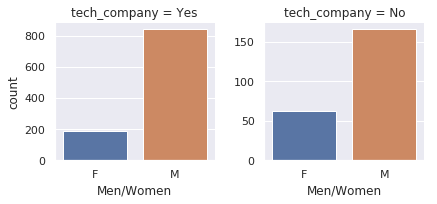

In [0]:
#men and women by tech_company

sns.set(style="darkgrid")

g = sns.catplot(col='tech_company', x='Gender', data=data, 
                kind='count', sharey=False, height=3)

g.set_axis_labels('Men/Women')

plt.show()

interpret: It's evident there's a lower ratio of women compared to men in the respondents who worked at tech companies.

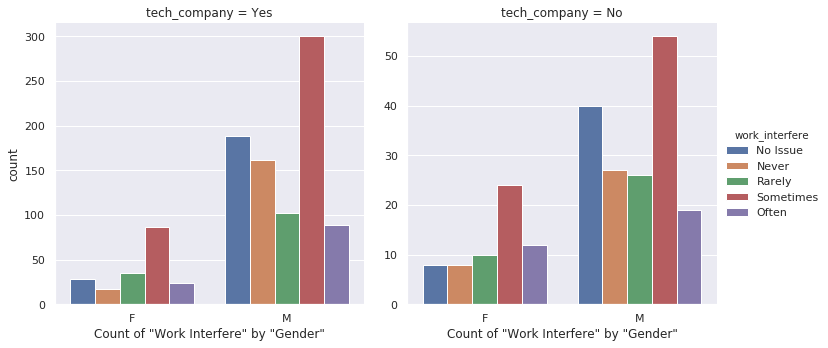

In [0]:
# relationship between gender, tech company and work interfere

sns.set(style="darkgrid")

g = sns.catplot(hue='work_interfere', x='Gender', col='tech_company', kind='count', 
                data=data, hue_order=['No Issue','Never','Rarely','Sometimes','Often'],
               sharey=False)
g = g.set_axis_labels('Count of "Work Interfere" by "Gender"')
plt.show()

interpret: 'work_interfere' for men seems to stay equally distributed regardless of 'tech_company'. Women seem to be affected differently with 'tech_company', but the number of data points is too small to make serious conclusions. There's only about 60 women respondents who don't work at tech companies.

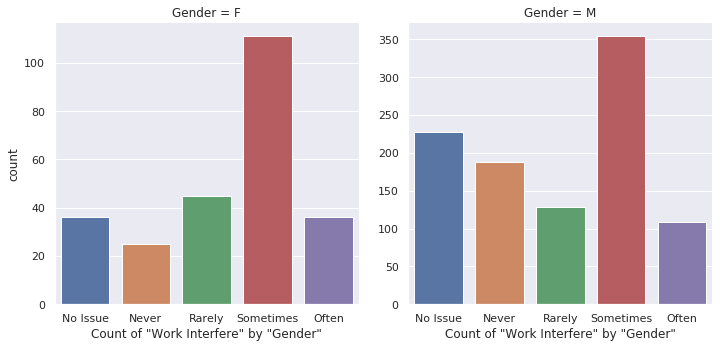

In [0]:
# men vs women's work interfere regardless of tech company 

sns.set(style="darkgrid")
g = sns.catplot(x='work_interfere', col='Gender', kind='count', 
                data=data, order=['No Issue','Never','Rarely','Sometimes','Often'],
               sharey=False)
g = g.set_axis_labels('Count of "Work Interfere" by "Gender"')
plt.show()

interpret: Men and women appear equally likely to be 'Sometimes' affected at work by their mental health issue, but men appear more likely to have 'No Issue' at all or to 'Never' be affected by it.

Earlier in the analysis we plotted the distributions of 'Age' categorized by 'work_interfere' facets, and found that the distributions were similar. What if 'Gender' or 'tech_company' paint a different 'Age' picture?

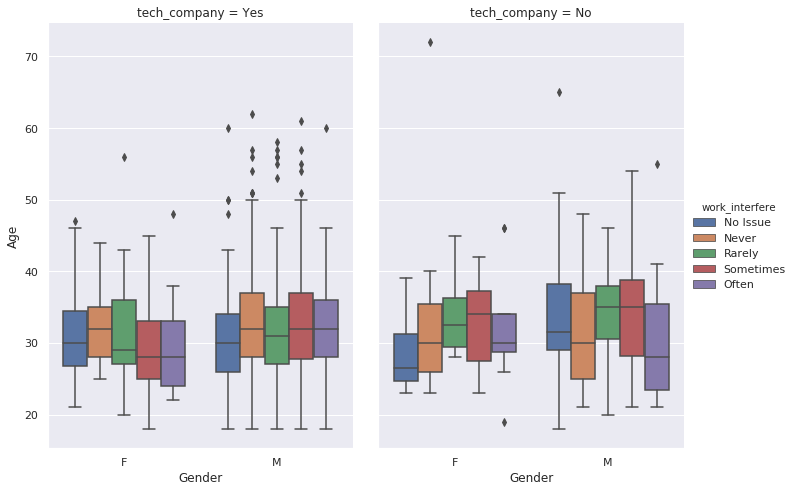

In [0]:
#age of work interfere by tech company and gender

sns.set(style="darkgrid")

g = sns.catplot(kind='box', y='Age', col='tech_company', x='Gender',
                hue='work_interfere', data=data, 
                hue_order=['No Issue','Never','Rarely','Sometimes','Often'],
               height=7, aspect=0.7)

interpret: This is the most telling figure so far. It tells that women in tech companies are more likely to be affected at work by a mental health issue the younger they are. Men in tech on the contrary, are more likely to be affected the older they are.

And interestingly, men and women not in tech show the inverse pattern. Older women and younger men are more affected.

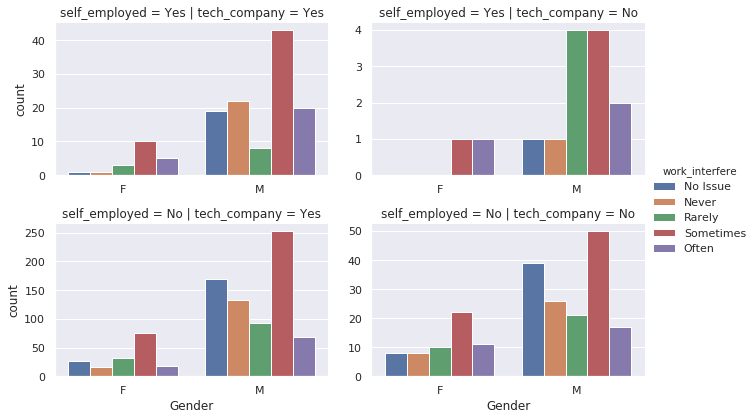

In [0]:
# how many respondents are self-employed
g = sns.catplot(kind='count', col='tech_company', x='Gender',
                hue='work_interfere', data=data, row='self_employed',
                hue_order=['No Issue','Never','Rarely','Sometimes','Often'],
               height=3, aspect=1.5, sharey=False, sharex=False)

interpret:

Self-Employed. There's too few non-tech entrepreneur respondents for statistical analysis. But if we trusted the visuals, across the board being self employed increases the chance of mental issues and work interference.
Tech Sector for Employees. Being in a tech company doesn't influence work interference for men employees. Women employees seem slightly more mentally healthy if they are in the tech sector.


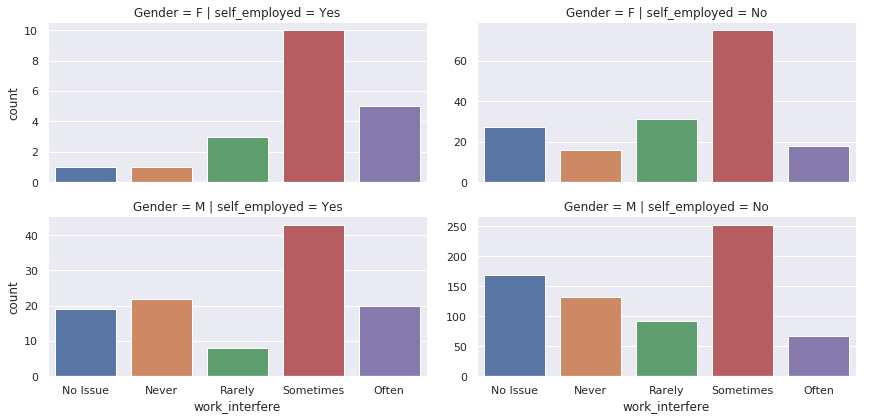

In [0]:
# isolate the respondents who are in the tech sector for the purposes of this figure.
dfplot = data[data.tech_company == 'Yes']
g = sns.catplot(kind='count', col='self_employed', x='work_interfere', row='Gender',
                data=dfplot, order=['No Issue','Never','Rarely','Sometimes','Often'],
               height=3, aspect=2, sharey=False)

interpret: Men employees in tech are more likely to be mentally healthy or unaffected at work compared to entrepreneurs.

Women entrepreneurs have a very small count, but show the same behavior.

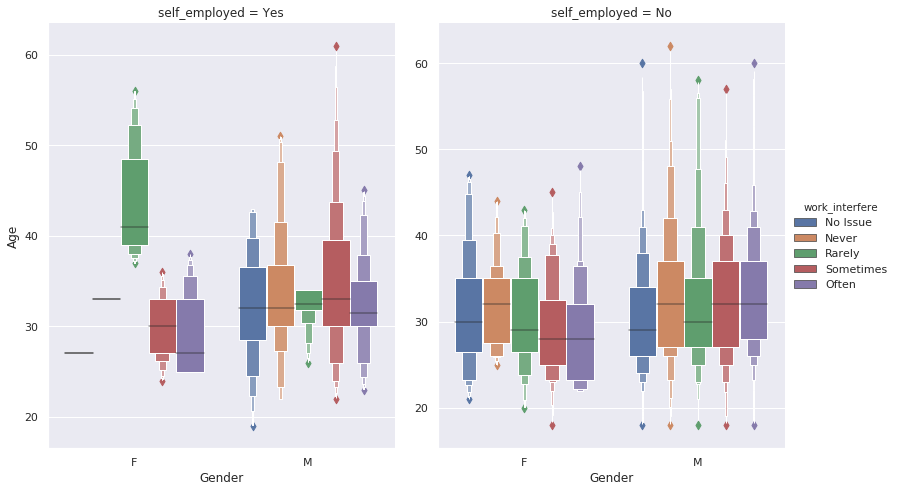

In [0]:
#age distribution by self employed status

dfplot = data[data.tech_company == 'Yes']
g = sns.catplot(kind='boxen', y='Age',col='self_employed', x='Gender', hue='work_interfere',
                data=dfplot, hue_order=['No Issue','Never','Rarely','Sometimes','Often'],
               height=7, aspect=0.8, sharey=False)

interpret: Based on the figure above, being self-employed doesn't alter the central tendency of age for men and women in tech, divided by work-interference.

If anything, the scarcity of data for self-employed women in tech is causing a big deviation from the pattern seen on the right side. Perhaps with more data, these facets would look more similar.

Identifying Focus Groups: Since we first analyzed the age distribution of work-interfere values for men and women, we observed that men employees in tech struggle more as they age, whereas women employees in tech struggle more the younger they are. ('Struggle' here refers to the work interference of mental health issues). Discarding the data for self-employed individuals, this pattern still holds true as can be seen on the right side.

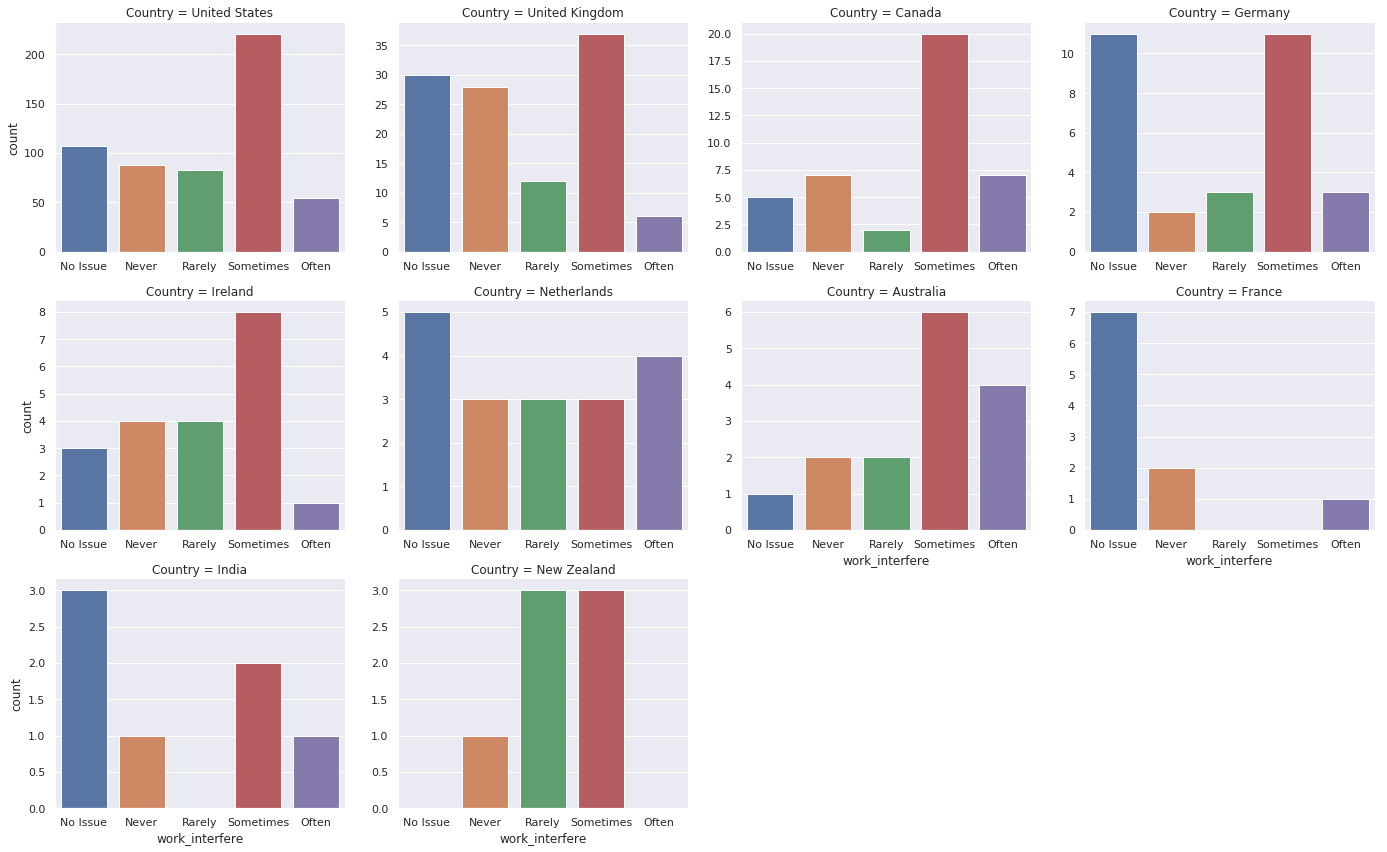

In [0]:
#influence of location in work interfere
# Create a list of the 10 countries with most respondents
countries = data.Country.value_counts()[:10].index.tolist()

# Slice the data to include only the 10 countries with most respondents, tech, and employees only.
dfplot = data[data.Country.isin(countries)][data.tech_company == 'Yes'][data.self_employed == 'No']

g=sns.catplot(col='Country', x='work_interfere', kind='count', data=dfplot, col_wrap=4, sharey=False,
             sharex=False, height=4, aspect=1.2, col_order=countries, 
              order=['No Issue','Never','Rarely','Sometimes','Often'])

plt.show()

interpret: Dutch, French and Indian respondents seem to be the most mentally healthy at work. However, the data from these countries is too small not to rule out high standard errors. For the purposes of this analysis, let's only keep the data from the 5 most abundant countries.

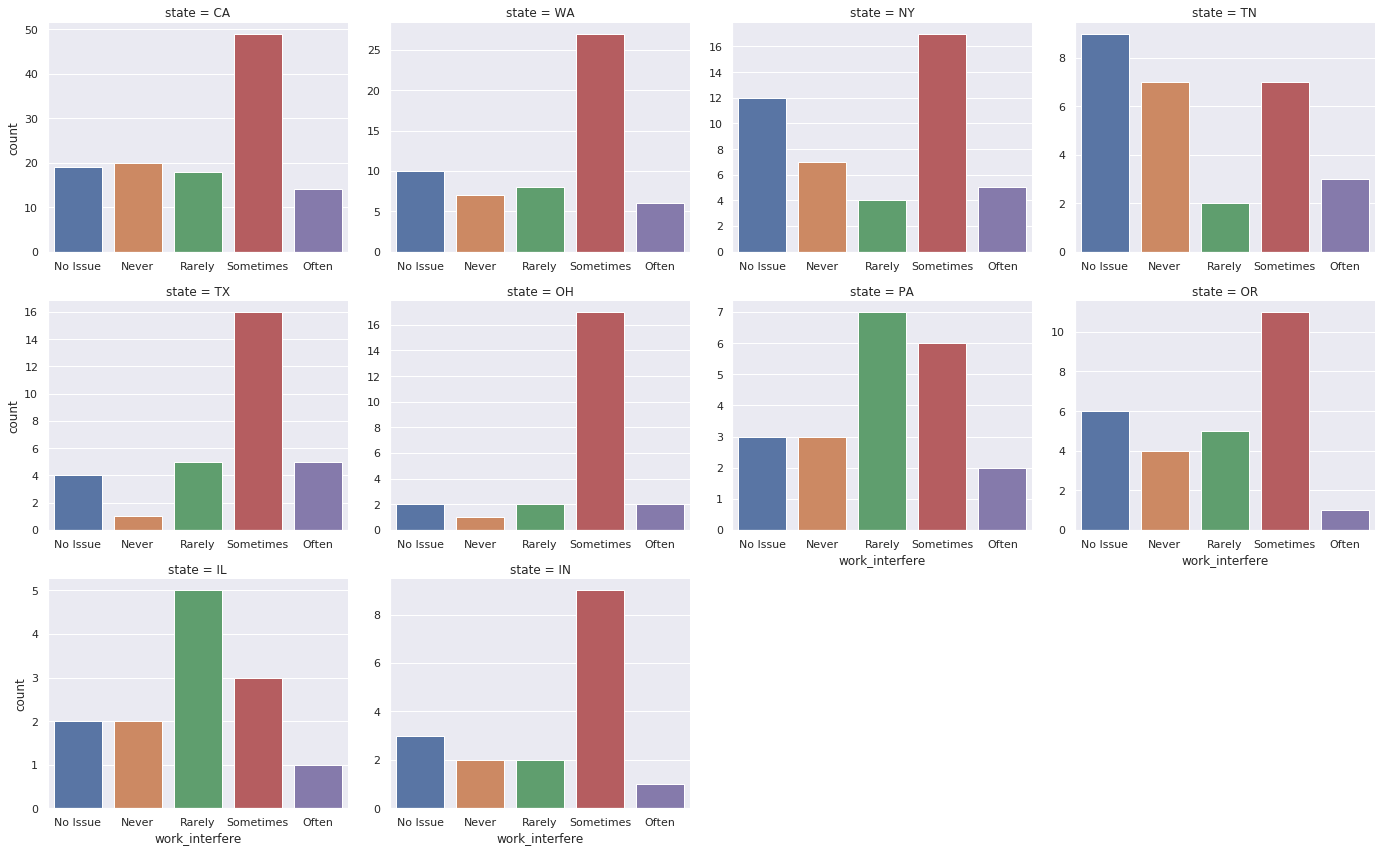

In [0]:
#visualizing work interfere by us state
# Slice the data to include only the US, in order to plot by state
states = data.state.value_counts()[:10].index.tolist()

# Slice the data to include only the 10 states with most respondents, tech, and employees only.
dfplot = data[data.state.isin(states)][data.tech_company == 'Yes'][data.self_employed == 'No']

g=sns.catplot(col='state', x='work_interfere', kind='count', data=dfplot, col_wrap=4, sharey=False,
             sharex=False, height=4, aspect=1.2, col_order=states, 
              order=['No Issue','Never','Rarely','Sometimes','Often'])

plt.show()

interpret: New York respondents seem too disproportionatelly with 'No-Issue', compared to California and Washington. There's also less data from here so it's not very relevant.

In [0]:
#influence of time on work interfere

#convert timestamp
data.Timestamp = pd.to_datetime(data.Timestamp)


In [0]:
data.Timestamp.describe()

count                    1259
unique                   1246
top       2014-08-27 14:22:43
freq                        2
first     2014-08-27 11:29:31
last      2016-02-01 23:04:31
Name: Timestamp, dtype: object

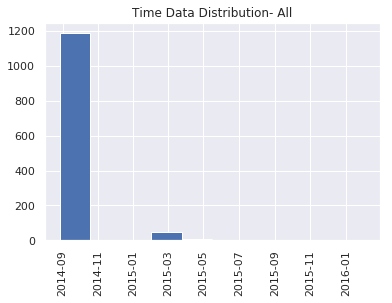

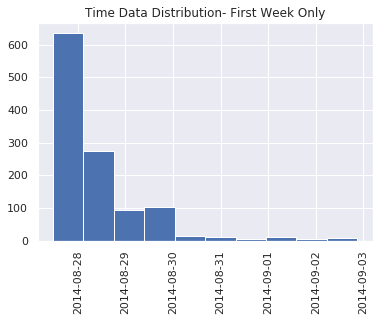

In [0]:
#visualize distribution of date/time for all the responses 
# put the dates in order
dfplot = data.sort_values(by='Timestamp')

# View the time distribution of raw data
dfplot.Timestamp.hist()
plt.title('Time Data Distribution- All')
plt.xticks(rotation=90)
plt.show()

# Slice a portion of the time series
dfplot = dfplot[dfplot.Timestamp < '2014-09-03']

# View the distribution of the slice
dfplot.Timestamp.hist()
plt.title('Time Data Distribution- First Week Only')
plt.xticks(rotation=90)
plt.show()

interpret: About 90% of the data was collected during the first week of the survey. This means we can rule out the possibility of seasonal affective disorders influencing people's self-evaluations.


BENEFITS
Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64


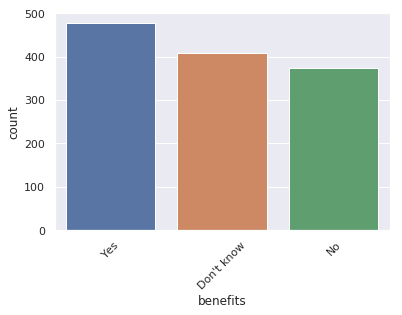


CARE_OPTIONS
No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64


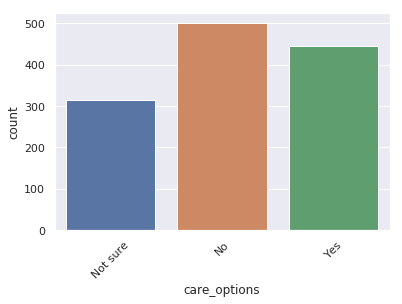


WELLNESS_PROGRAM
No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64


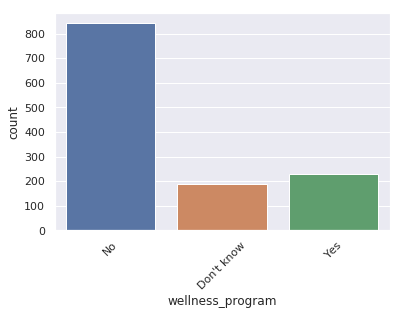


SEEK_HELP
No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64


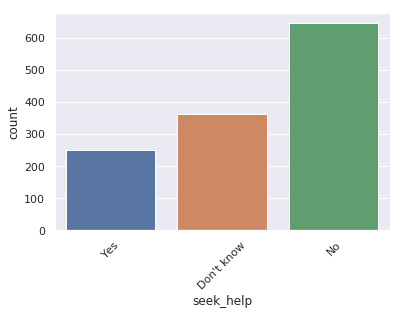


ANONYMITY
Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64


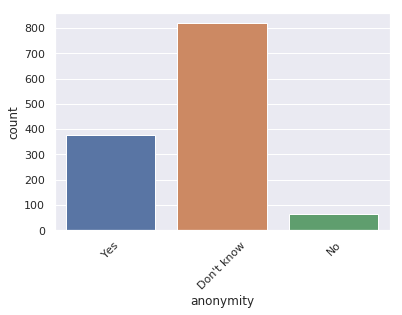


LEAVE
Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64


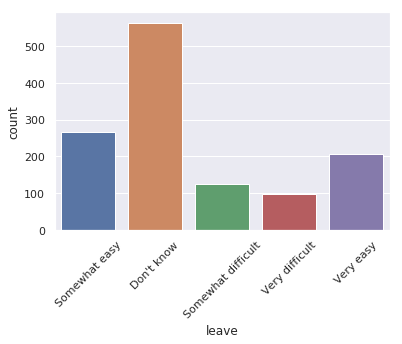

In [0]:
#influence of support in work interfere
# explore categories of each variable related to mental health services
categorical = data.loc[:,'benefits':'leave'].select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print('\n'+ i.upper())
    print(column.value_counts())
    sns.countplot(data=categorical, x=column)
    plt.xticks(rotation=45)
    plt.show()

To clarify what these variables stand for:

Benefits: Does your employer provide mental health benefits as part of healthcare coverage?

Options: Do you know the options for mental health care available under your employer-provided coverage?

Wellness-Program: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
Seek-Help: Does your employer offer resources to learn more about mental health concerns and options for seeking help?

Anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?

Leave: If a mental health issue prompted you to request a medical leave from work, asking for that leave would be...

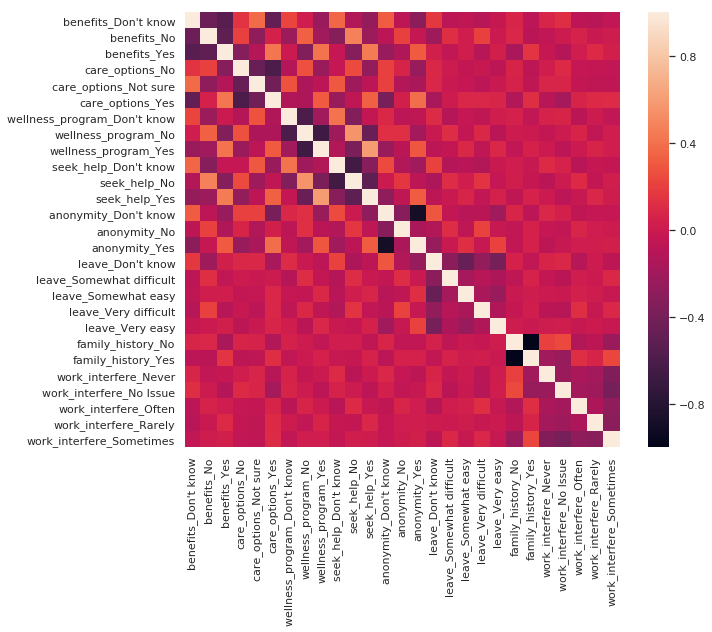

In [0]:
#correlations with work interfere 
# Define a subset of data including mental-care variables, plus 'work_interfere'
# and 'family_history'.

health = pd.concat([data.loc[:,'benefits':'leave'],data[['family_history','work_interfere']]],axis=1)

# Plot a correlation matrix, using dummies.
plt.figure(figsize=(10,8))
sns.heatmap(pd.get_dummies(health).corr(),square=True)
plt.show()

interpret: The feature 'work_interfere_often' has its strongest correlation with the feature 'family_history_Yes' and 'leave_Very difficult'. This means that the people who had a family history of mental health where more likely to be 'Often' affected at work if they felt it was 'Very difficult' to take leave days.

In [0]:
# Scaling Age
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,0.351852,F,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,0.481481,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,0.259259,M,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,0.240741,M,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,0.240741,M,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [0]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in data:
    if feature in intFeatures:
        data[feature] = data[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        data[feature] = data[feature].fillna(defaultString)
    elif feature in floatFeatures:
        data[feature] = data[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
data.head(5)   

Error: Feature Timestamp not recognized.
Error: Feature state not recognized.
Error: Feature comments not recognized.


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,0.351852,F,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,0.481481,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,0.259259,M,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,0.240741,M,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,0.240741,M,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [0]:
#clean 'Gender'
#Slower case all columm's elements
gender = data['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = data['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in data.iterrows():

    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        data['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
dadta = data[~data['Gender'].isin(stk_list)]

print(data['Gender'].unique())

['female' 'male']


In [0]:
#complete missing age with mean
data['Age'].fillna(data['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(data['Age'])
s[s<18] = data['Age'].median()
data['Age'] = s
s = pd.Series(data['Age'])
s[s>120] = data['Age'].median()
data['Age'] = s

#Ranges of Age
data['age_range'] = pd.cut(data['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [0]:
#Replace "NaN" string from defaultString
data['self_employed'] = data['self_employed'].replace([defaultString], 'No')
print(data['self_employed'].unique())

['No' 'Yes']


In [0]:
#Replace "NaN" string from defaultString

data['work_interfere'] = data['work_interfere'].replace([defaultString], 'Don\'t know' )
print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' 'No Issue']


In [0]:
data = data.drop(['comments'], axis= 1)
data = data.drop(['state'], axis= 1)

In [0]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
age_range                      0      0.0
obs_consequence                0      0.0
Age                            0      0.0
Gender                         0      0.0
Country                        0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0  

In [0]:
#Encoding data
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
# Get labels
labelKey = 'label_' + feature
labelValue = [*le_name_mapping]
labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)

#Get rid of 'Country'
data = data.drop(['Country'], axis= 1)
data.head()

label_age_range ['0-20']


,Timestamp,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0,0,0,0,0,1,2,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,0
1,1,0,1,0,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
2,2,0,1,0,0,0,3,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,0
3,3,0,1,0,1,1,2,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,0
4,4,0,1,0,0,0,0,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,0


In [0]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = data[feature_cols]
y = data.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

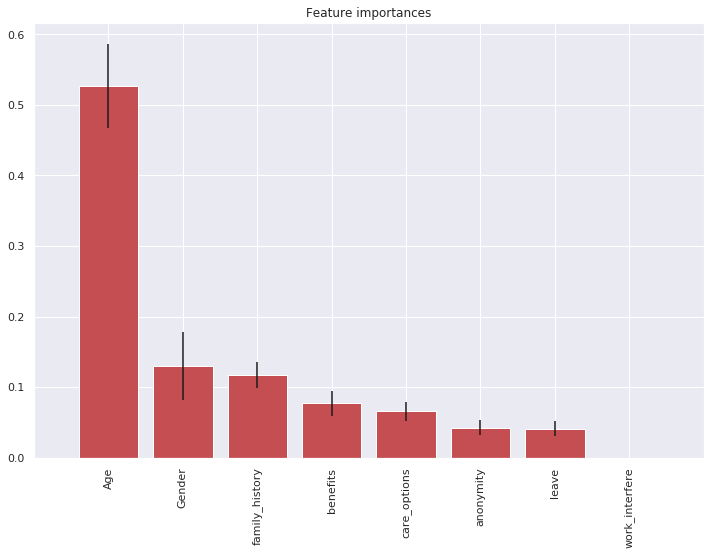

In [0]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [0]:
#Classification accuracy: percentage of correct predictions
#calculate accuracy

def evalClassModel(model, y_test, y_pred_class, plot = False):
  print('Accuracy:', metircs.accuracy_score(y_test, y_pred_class))

In [0]:
#class dist. of test set
print('Null accuracy:\n', y_test.value_counts())

Null accuracy:
 1    190
0    188
Name: treatment, dtype: int64


In [0]:
#calculate percentage of ones
print('Percentage of ones:', y_test.mean())

Percentage of ones: 0.5026455026455027


In [0]:
#calculate percentage of zeros
print('Percentage of zeros:',1 - y_test.mean())


Percentage of zeros: 0.4973544973544973


In [0]:
 #Comparing the true and predicted response values
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

#why the fuck is this happening? Why does baby jesus hate me so much ??

True: [0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0]


NameError: ignored

In [0]:
import tensorflow as tf
import argparse


batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

In [0]:
# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

In [0]:
# Build a DNN with 2 hidden layers and 10 nodes in each hidden layer.
model = tf.estimator.DNNClassifier(feature_columns=feature_columns,
                                    hidden_units=[10, 10],
                                    optimizer=tf.train.ProximalAdagradOptimizer(
                                      learning_rate=0.1,
                                      l1_regularization_strength=0.001
                                    ))

W0830 01:54:50.327345 140705395898240 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpxm3w5zkq


In [0]:
model.train(input_fn=lambda:train_input_fn(X_train, y_train, batch_size), steps=train_steps)

W0830 01:54:53.402311 140705395898240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0830 01:54:53.454044 140705395898240 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0830 01:54:54.552576 140705395898240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/canned/head.py:437: to_float (from tenso

In [0]:
# Evaluate the model.
eval_result = model.evaluate(
    input_fn=lambda:eval_input_fn(X_test, y_test, batch_size))

print('\nTest set accuracy: {accuracy:0.2f}\n'.format(**eval_result))

#Data for final graph
accuracy = eval_result['accuracy'] * 100
methodDict['NN DNNClasif.'] = accuracy

W0830 01:54:58.462350 140705395898240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/metrics_impl.py:2027: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
W0830 01:54:59.064506 140705395898240 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0830 01:54:59.090150 140705395898240 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0830 01:54:59.251730 140705395898240 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with th


Test set accuracy: 0.80



In [0]:
predictions = list(model.predict(input_fn=lambda:eval_input_fn(X_train, y_train, batch_size=batch_size)))

In [0]:
# Generate predictions from the model
template = ('\nIndex: "{}", Prediction is "{}" ({:.1f}%), expected "{}"')

# Dictionary for predictions
col1 = []
col2 = []
col3 = []


for idx, input, p in zip(X_train.index, y_train, predictions):
    v  = p["class_ids"][0] 
    class_id = p['class_ids'][0]
    probability = p['probabilities'][class_id] # Probability
    
    # Adding to dataframe
    col1.append(idx) # Index
    col2.append(v) # Prediction
    col3.append(input) # Expecter
    
   
    #print(template.format(idx, v, 100 * probability, input))


results = pd.DataFrame({'index':col1, 'prediction':col2, 'expected':col3})
results.head()

,index,prediction,expected
0,825,1,0
1,905,1,1
2,579,1,1
3,367,1,1
4,615,1,1


In [0]:
# Generate predictions with the best method
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)

# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('results.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,986,1
4,186,0


- percentage of correct predictions
- percentage of true that are right
- percentage of true that are wrong
- percentage of false that right
- percentage of false that wrong


In [0]:
results.set_index('Index')

,Treatment
Index,
5,1
494,0
52,0
986,1
186,0
18,1
317,0
511,1
364,1


In [0]:
results.set_index('Index')
results = results.merge(y_test, left_index=True, right_index=True)

In [0]:
results['X'] = results['treatment']
results['y'] = results['Treatment']

In [0]:
import sklearn.metrics as met

In [0]:
met.confusion_matrix(results['X'],results['y'])

array([[21, 29],
       [24, 22]])